<a id="1"></a>
# <p style="background-color: #265576; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:1300px 60px; overflow:hidden; padding:25px">Assessing Pregnancy Risks: EDA, Modeling, and Hypothesis Testing</p>

![pregnancy](https://cdn.pixabay.com/photo/2022/05/22/19/04/pregnancy-7214373_1280.jpg)

<a id="contents"></a>
# <p style="background-color: #265576; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Table Of Contents</p>

- <a href="#intro">1. Introduction</a>  
- <a href="#libraries">2. Installing Required Libraries</a>
- <a href="#data">3. Reading and Understanding our Data</a>
- <a href="#clean">4. Data Cleaning</a>
    - <a href="#dup">4.1. Drop duplicates</a>
    - <a href="#error">4.2. Fix error in HeartRate column</a>
- <a href="#encode">5. Feature Encoding for Categorical Variable</a>
- <a href="#outliers">6. Exploring Outliers</a>
- <a href="#eda">7. Exploratory Data Analysis</a>   
    - <a href="#unibi">7.1. Univariate and Bivariate Analysis</a>
    - <a href="#corr">7.2. Looking for Correlations</a>
    - <a href="#skew">7.3. Skew Variables Transformation</a>
- <a href="#prepr">8. Data Preprocessing</a>
    - <a href="#sep">8.1 Separate features and target</a>
    - <a href="#scale">8.2 Feature Scaling</a>
    - <a href="#split">8.3. Train / Test Split</a>   
- <a href="#ml">9. ML Models</a>
    - <a href="#knn">9.1. KNeighborsClassifier</a>
    - <a href="#svc">9.2. Support Vector Machine</a>
    - <a href="#rfc">9.3. Random Forest Classifier</a>
    - <a href="#xgb">9.4. XGBoost Classifier</a>
- <a href="#ht"> 10. Bonus: Hypothesis Testing</a>

<a id="intro"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1. Introduction</p>

Pregnancy is a profound and transformative journey in a woman's life, filled with excitement and anticipation. However, it also comes with various risks and challenges, both for the expectant mother and her unborn child. Predicting and managing these risks is crucial to ensuring a safe and healthy pregnancy. This is where the field of data science plays a pivotal role.

This data science project aimed at using the power of data science and machine learning to enhance the prenatal care and well-being of pregnant women. It seeks to develop a predictive model that can assess the risk factors associated with pregnancy.

The data for this project was taken from [here](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data). It has been collected from different hospitals, community clinics, maternal health cares through the **IoT** based risk monitoring system.

Columns in the dataset:

- `Age`: Age in years when a woman is pregnant.
- `SystolicBP`: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- `DiastolicBP`: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- `BS`: Blood glucose levels is in terms of a molar concentration, mmol/L.
- `HeartRate`: A normal resting heart rate in beats per minute.
- `Risk Level`: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

<a id="libraries"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">2. Installing Required Libraries</p>

For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
  - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) and [`xgboost`](https://xgboost.readthedocs.io/en/stable/) for machine learning and machine-learning-pipeline related functions.
  - [`scipy`](https://scipy.org/) for statistical computations.
  - [`statsmodels`](https://www.statsmodels.org/stable/index.html) for statistical modeling and hypothesis testing.

In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import scipy.stats as stats
from scipy.stats import chi2_contingency, boxcox

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [51]:
import warnings
warnings.filterwarnings("ignore")

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="data"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">3. Reading and Understanding our Data</p>

Let's read the data into pandas data frame and look at the first 5 rows.

In [52]:
data = pd.read_csv("/content/Maternal Health Risk Data Set.csv")

In [53]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


We can find more information about the features and types using the `info()` method.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Let's check for duplicates with `.duplicated()` method.

In [55]:
data[data.duplicated(keep='first')]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


More than a half of the rows are duplicated! They might alter our analysis, thus we will have to remove them.

To see more statistical information about the dataset, we can use `.describe()` method.

In [56]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Let's explore observations with ages over 60 and above 13 years old.

In [57]:
data[data.Age > 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
114,63,140,90,15.0,98.0,90,high risk
313,62,120,80,6.9,98.0,66,low risk
322,65,90,60,6.9,98.0,70,low risk
326,66,85,60,6.9,98.0,86,low risk
338,70,85,60,6.9,102.0,70,low risk
339,65,120,90,6.9,103.0,76,low risk
435,65,130,80,15.0,98.0,86,high risk
502,63,140,90,15.0,98.0,90,high risk


In [58]:
len(data[data.Age < 13])

39

Count the occurrences of each unique value in the `BodyTemp` column. This provides insight into the distribution of body temperatures within the dataset.

In [59]:
data.BodyTemp.value_counts()

,count
BodyTemp,
98.0,804
101.0,98
102.0,66
100.0,20
103.0,13
99.0,10
98.4,2
98.6,1


Explore observations with low heart rate.

In [60]:
data[data.HeartRate < 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


### Observations from Initial Data Exploration:
- We have **1014 entries**, as well as **7 features**.
- The first 5 columns are stored as **integers** and **floats**, and the dtype of the last column (risk level) is **object**, which needs to be converted into numerical values for machine learning.
- **RiskLevel** will be our target or response variable and the rest of the features will be our predictor variables.
- There is **no null values**.
- There are a lot of **dulicated rows**.
- Range of age is from 10 till 70 years old. Even though it's uncommon, it is possible for some girls to be pregnant at 10 y.o., as well as for some women to be pregnant at 70 y.o. For example, [here](https://www.statista.com/statistics/410744/birth-rate-for-us-girls/) is the data on birth rate for US girls aged 10-14 years.
- It is important to note that the minimum values of all columns are greater than 0.
- There is an observation with heart rate 7, which doesn't make sense. We will have to fix it. P.S. it looks like there are 2 observations, but it is actually one duplicated.

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="clean"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">4. Data Cleaning</p>

In [61]:
# create copy of the dataset
df = data.copy()

<a id="dup"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">4.1. Drop duplicates</p>

In [62]:
df = df.drop_duplicates().reset_index(drop=True)

In [63]:
df.shape

(452, 7)

<a id="error"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">4.2. Fix error in HeartRate column</p>

There is an observation with heart rate 7, which doesn't make sense. Most probably, it was a mistake in data entry, but we do not know the correct value, it could be 70 or 67 or 77. Let's replace it with a mode of the column.

In [64]:
df.HeartRate.mode()

,HeartRate
0,70


In [65]:
df.loc[df.HeartRate == 7, "HeartRate"] = 70

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="encode"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">5. Feature encoding for categorical variable</p>

In [66]:
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

Type of the HeartRate column is ordinal, in other words, it takes values in ordered categories. For this, we can perform a label encoding, where values are manually assigned to the corresponding keys, using the `replace()` function.

In [67]:
df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="outliers"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">6. Exporing the Outliers</p>

In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots.


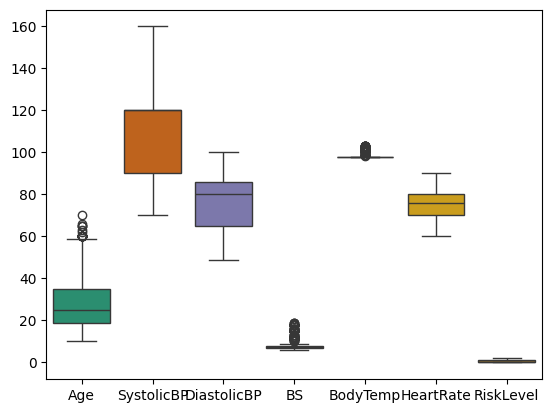

In [68]:
sns.set_palette("Dark2")

sns.boxplot(df);

From this simple boxplot of the whole dataframe above, we can find columns with outliers for further inspection, as well, we can see that our variables have different scales, and later we might need to perform feature scaling.

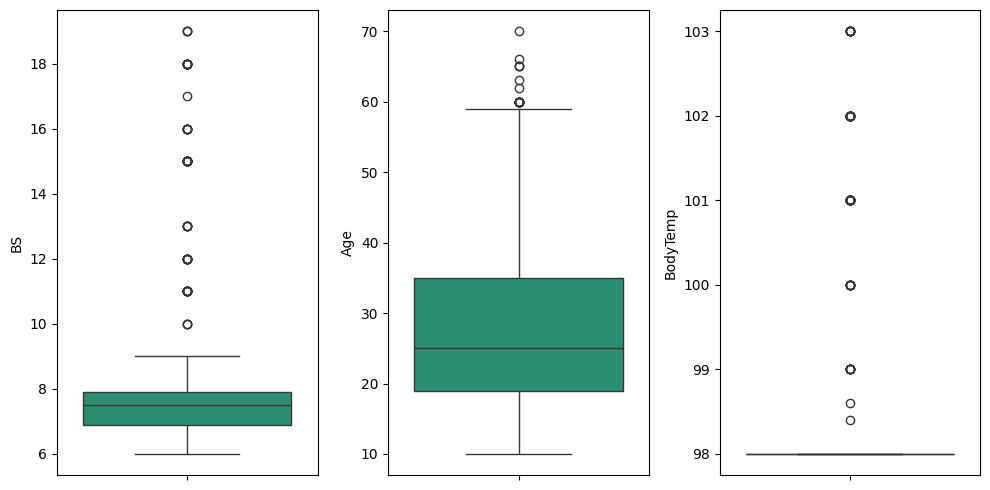

In [69]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'BS', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Age', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'BodyTemp', data = df)

plt.tight_layout()
plt.show();

As we can see from these plots, we have some points that are plotted outside the box plot area and that greatly deviate from the rest of the population. Whether to remove or keep them greatly depends on the understanding of our data and the type of analysis to be performed. In this case, the points that are outside of our box plots might be the actual true data points and do not need to be removed.

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="eda"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">7. Exploratory Data Analysis</p>

<a id="unibi"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">7.1. Univariate and Bivariate Analysis</p>

### Age

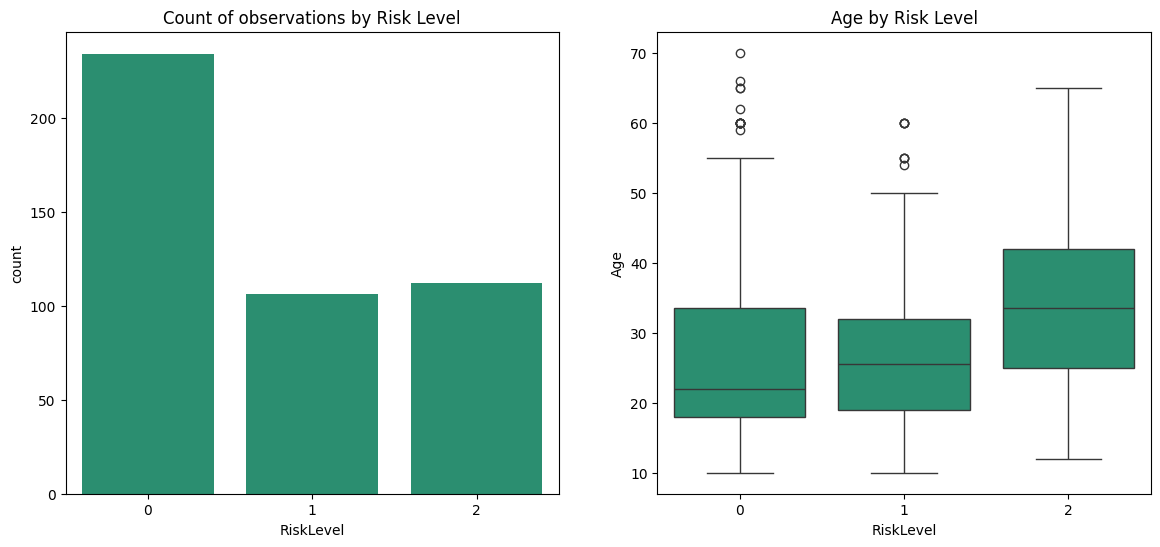

In [70]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=df.RiskLevel)
axes[0].set_title("Count of observations by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.Age)
axes[1].set_title("Age by Risk Level");

### Blood Glucose Level

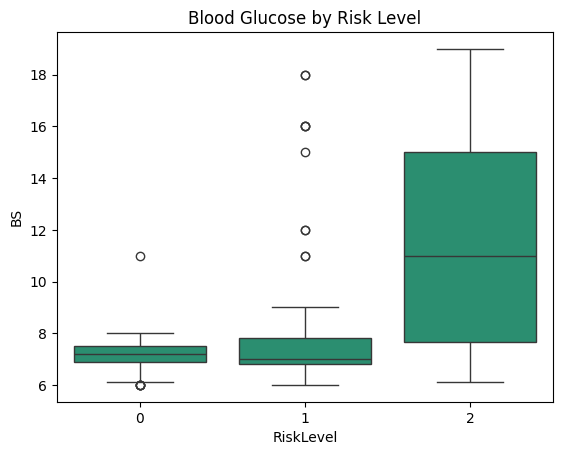

In [71]:
sns.boxplot(x=df.RiskLevel, y=df.BS).set_title("Blood Glucose by Risk Level");

### Blood Pressure

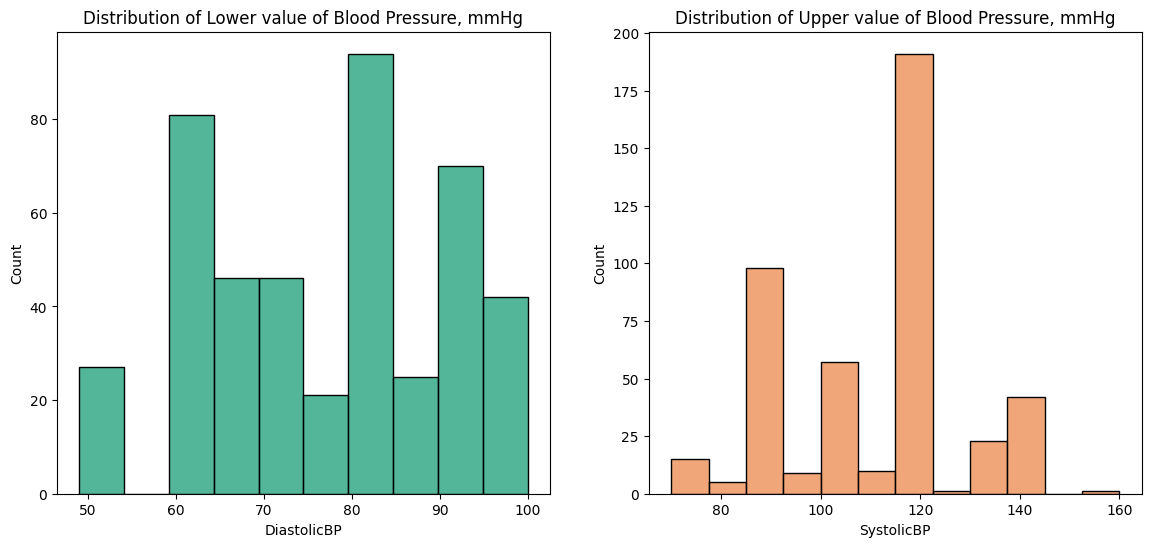

In [72]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.DiastolicBP)
axes[0].set_title("Distribution of Lower value of Blood Pressure, mmHg")

sns.histplot(ax=axes[1], x=df.SystolicBP, color="#ed894e")
axes[1].set_title("Distribution of Upper value of Blood Pressure, mmHg");

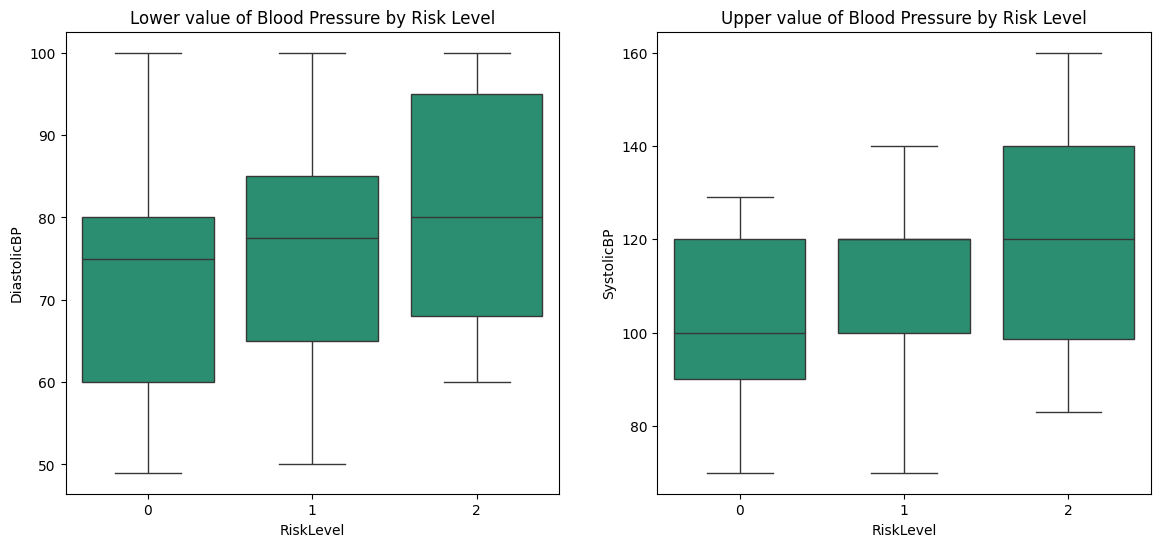

In [73]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.boxplot(ax=axes[0], x=df.RiskLevel, y=df.DiastolicBP)
axes[0].set_title("Lower value of Blood Pressure by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.SystolicBP)
axes[1].set_title("Upper value of Blood Pressure by Risk Level");

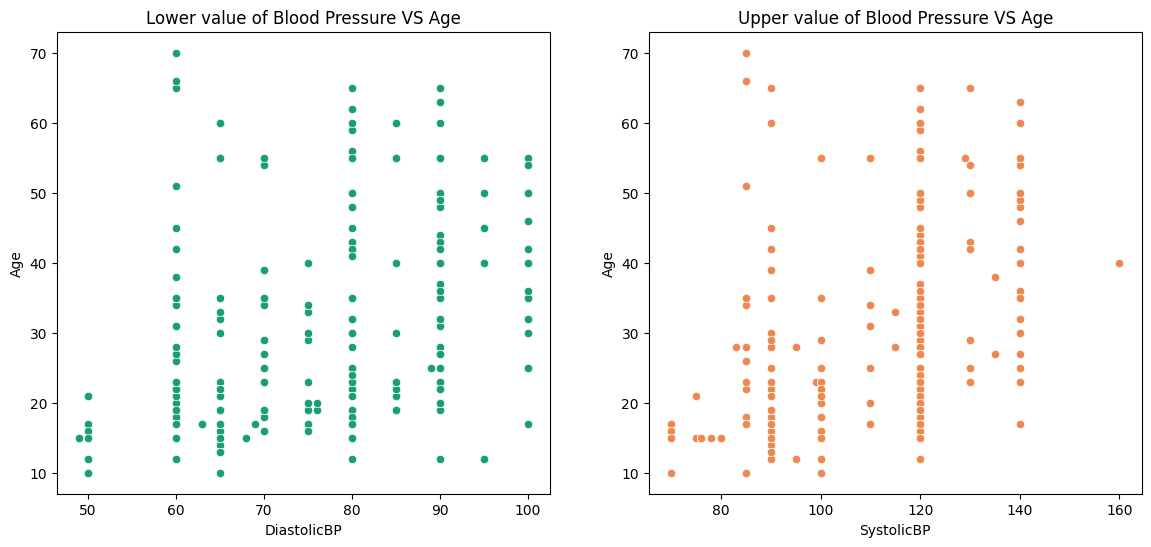

In [74]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.scatterplot(x=df.DiastolicBP, y=df.Age, ax=axes[0])
axes[0].set_title("Lower value of Blood Pressure VS Age")

sns.scatterplot(ax=axes[1], x=df.SystolicBP, y=df.Age, color="#ed894e")
axes[1].set_title("Upper value of Blood Pressure VS Age");


### Body Temperature

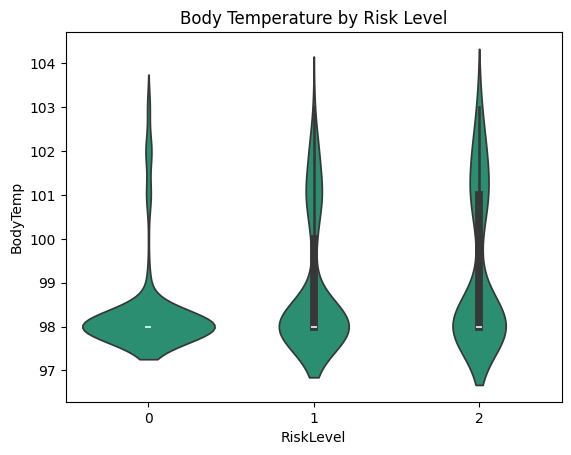

In [75]:
sns.violinplot(y=df.BodyTemp, x=df.RiskLevel).set_title("Body Temperature by Risk Level");

### Heart Rate

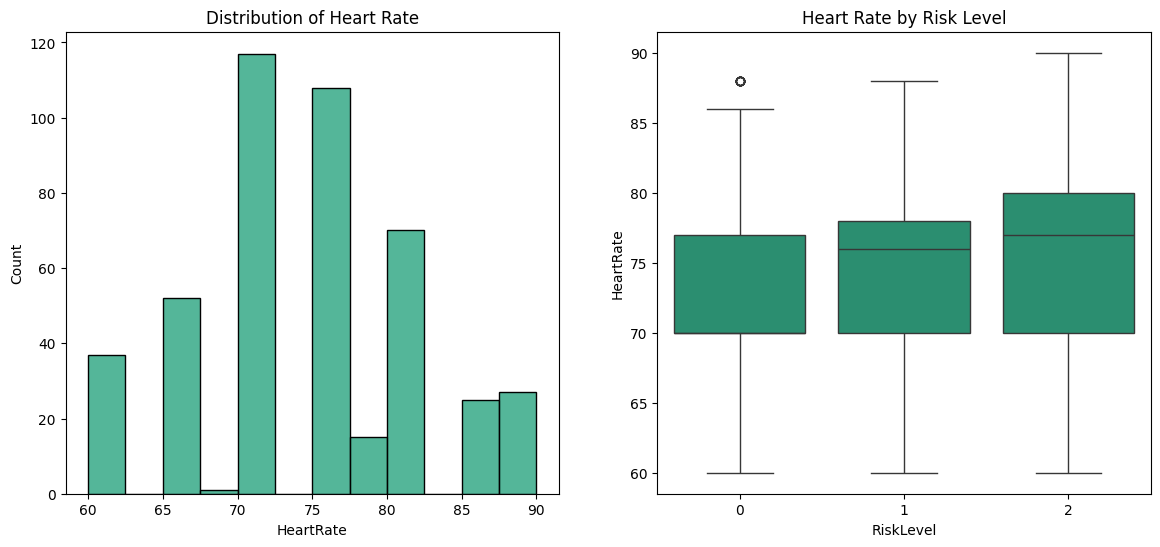

In [76]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.HeartRate)
axes[0].set_title("Distribution of Heart Rate")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.HeartRate)
axes[1].set_title("Heart Rate by Risk Level");

### Observations from visualizations above:
- The **low risk pregnancies** are the most frequent overall, they happen in more than half of the cases.
- Younger women tend to have **low** and **mid** risk pregnancies, while the pregnancies of women above 35 y.o. more often are classified as **high** risk, thus, need more attention.
- If a pregnant woman has a **blood sugar** higher than 8 mmol/L, in most of the cases, the pregnancy is considered high risk.
- Distribution of lower value of **blood pressure** is more spread, around 60-100 mmHg, compared to distribution of upper value, which is centered around 120 mmHg.
- Higher **blood pressure** (both systolic and diastolic), higher **body temperature** are associated with **higher risk** pregnancies.
- As for correlation between age and blood pressure, very low blood pressure (both systolic and diastolic) was observed in some of the girls and young women, but normal and high blood pressure don't seem to be much correlated with age, at least in our dataset.
- Heart rate of pregnant women is **normally distributed** and it's only slightly associated with risk level.

<a id="corr"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">7.2. Looking for Correlations</p>

It is useful to establish a correlation between the response variable and other predictor variables, as some of them might not have any major impact in determining the risk level and will not be used in the analysis.
Now we will construct a `heatmap()`, using the *seaborn* library.

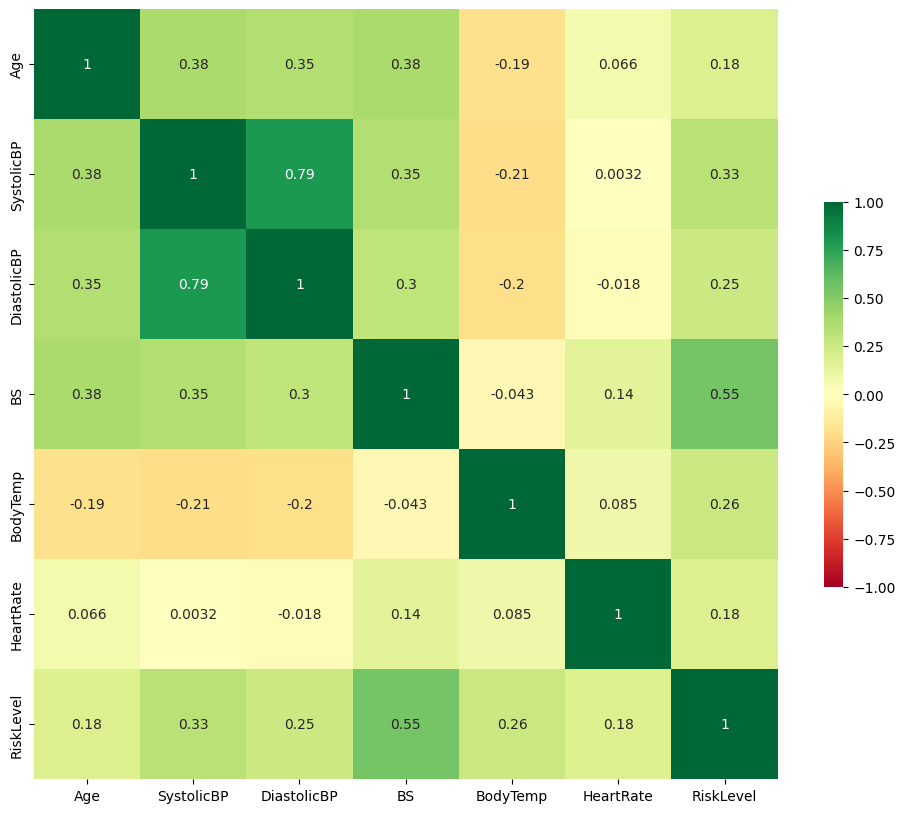

In [77]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn', vmin=-1, center=0,
           cbar_kws={"shrink": .5})

plt.show()

From the heatmap above, extreme green means highly positively correlated features (relationship between two variables in which both variables move in the same direction), extreme red means negatively correlated features (relationship between two variables in which an increase in one variable is associated with a decrease in the other). All the variables seem to be positively correlated with our response variable.

We can see that there is only one highly correlated variable, which is BS (blood sugar). The rest of the variables have some positive correlation, but not so strong. If we had a lot of variables, we could select only highly correlated ones for future analysis. But because we have only 7 columns, we will use all of them.

<a id="skew"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">7.3. Skew Variables Transformation</p>

Skewness refers to data distortion or symmetry/ asymmetry of data distribution. When your data is skewed, the value of the mean and the median is different. Skewness violates the normality assumption of some ML models, for example, linear regression.

Now, we will create a pairplot to see a histogram of each column, in order to check if any of the variables are skewed.

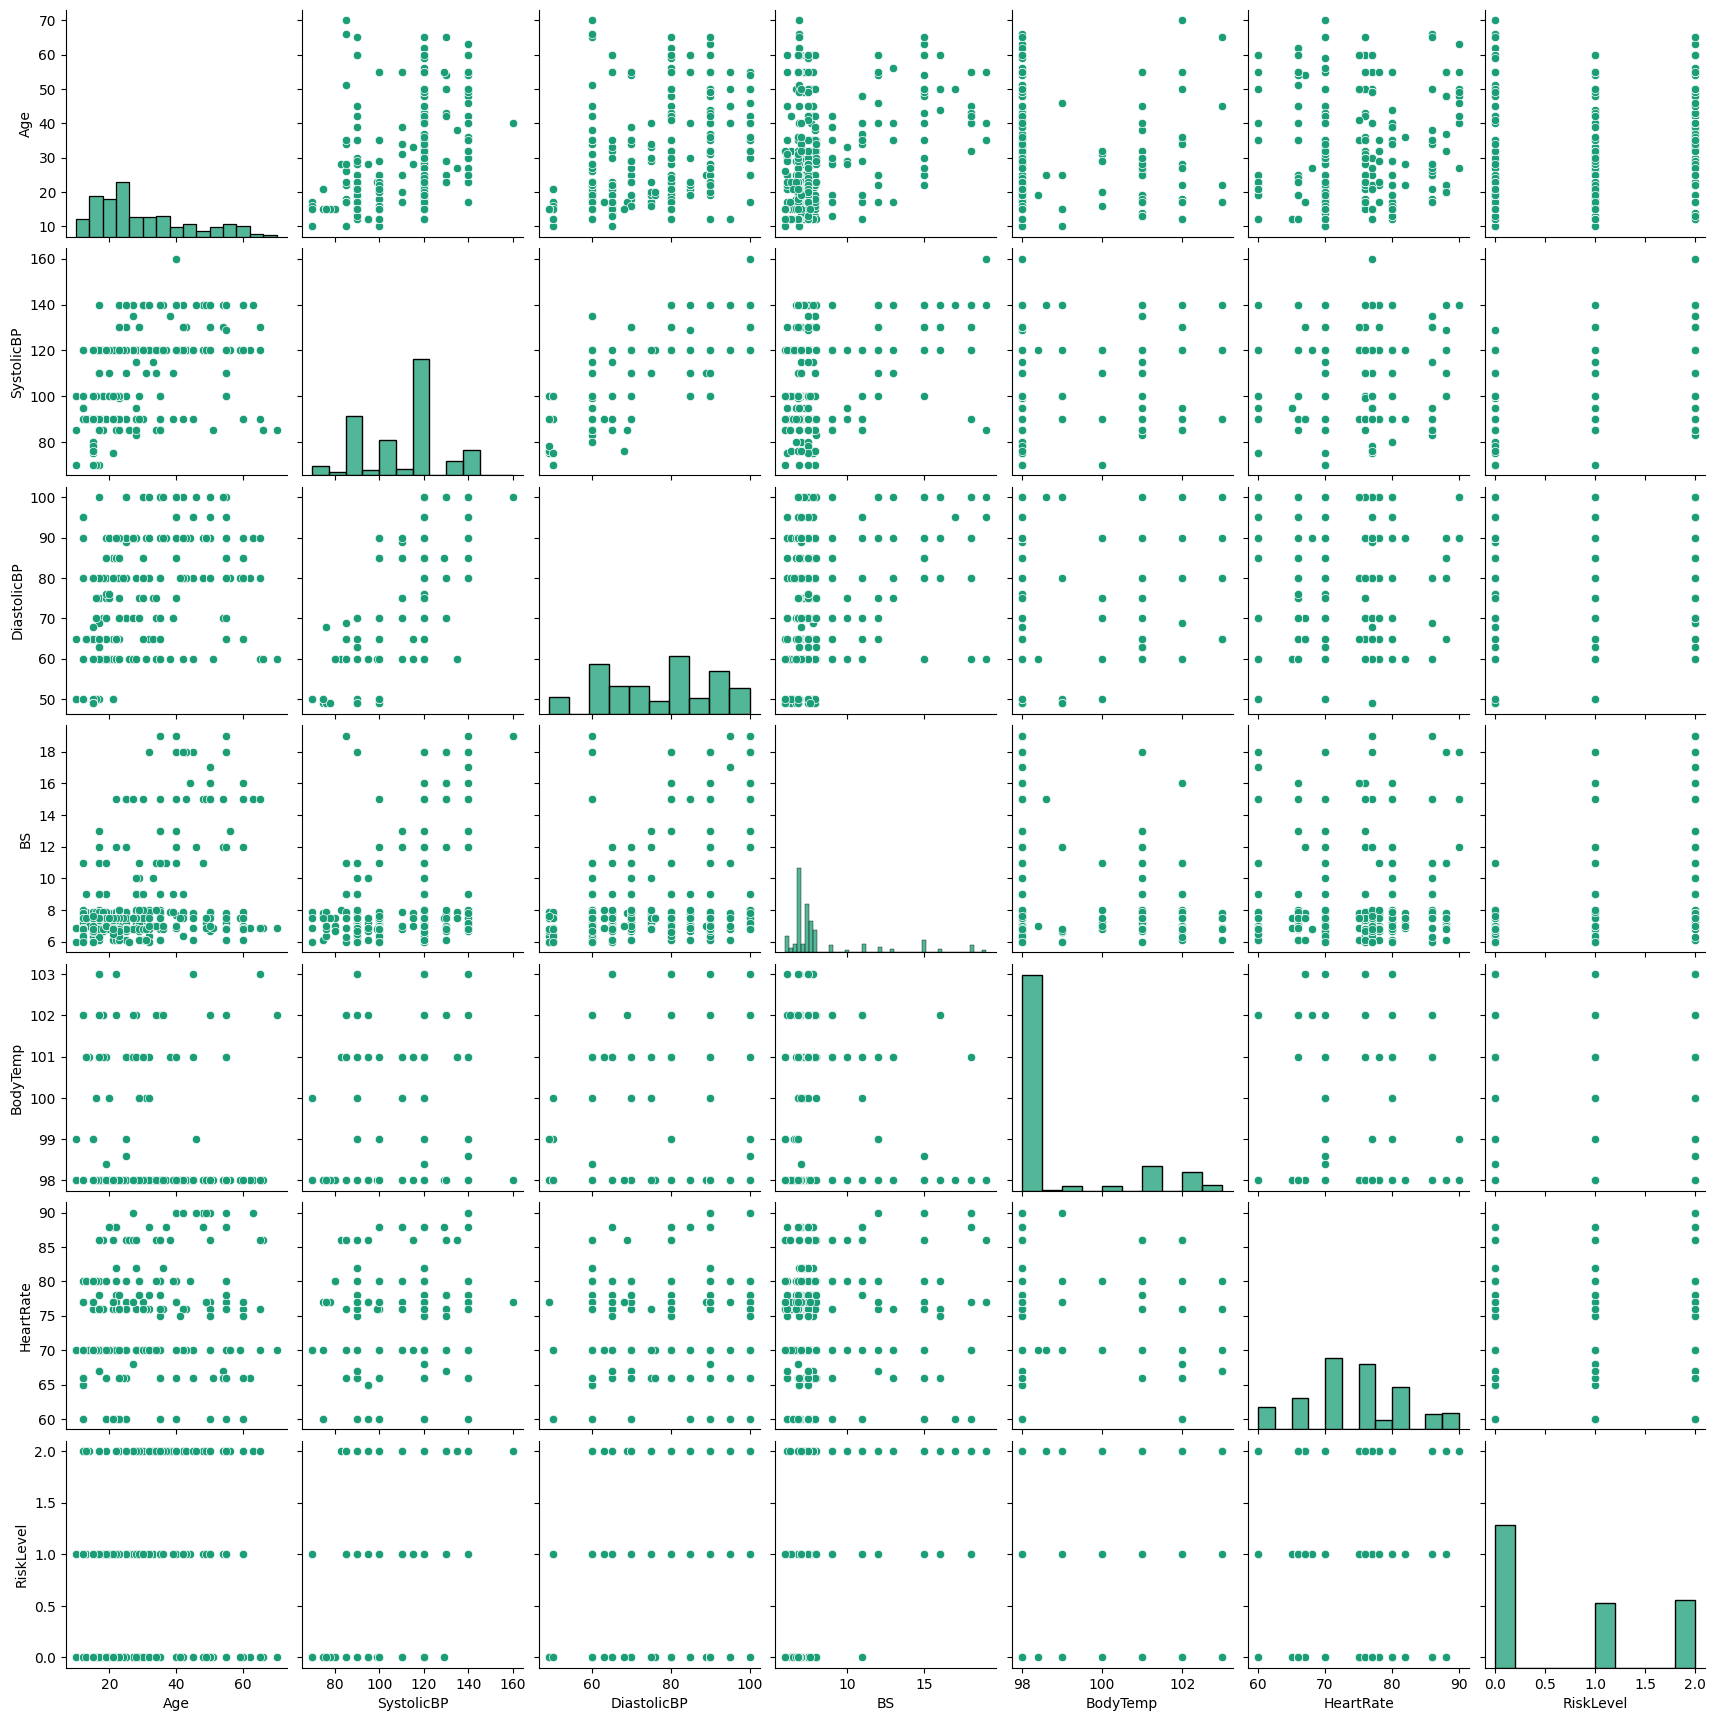

In [78]:
sns.pairplot(df);

Visually, it looks like BS (blood sugar) and BodyTemp (body temperature) are highly skewed.They both have a longer tail to the right, so we call it a positive skew. Let's calculate skewness levels with `.skew()` method.

In [79]:
skew_limit = 0.75 # define a limit above which we will log transform

# Create a list of numerical colums to check for skewing
mask = data.dtypes != object
num_cols = data.columns[mask]

skew_vals = df[num_cols].skew()

In [80]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
BS,2.262874
BodyTemp,1.751794
Age,0.922079


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have skewness of blood sugar ~2.26 and of body temperature around 1.75, which is considered highly skewed data. Skew of age is around 0.92, which is moderate skewness.

P.S. the distribution of BodyTemp column makes it impossible to transform it to a normal distribution (most of the rows have the same value, which is the minimum of the column), so we will not change it.

But we can transform our Blood Sugar and Age columns, so they look more normally distributed. Depends on the shape of the distribution, we can use different common transformations to make features be normally distributed:

* Log
* Square root
* Box cox

#### Log

0.197419127736239


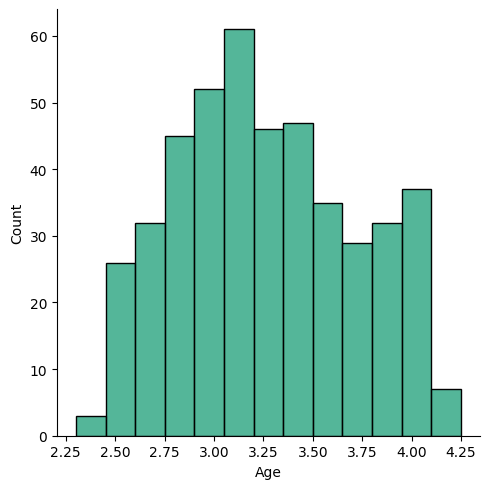

In [81]:
df_transformed = df.copy()

df_transformed["Age"] = df["Age"].apply(np.log)
print(df_transformed["Age"].skew())
sns.displot(df_transformed.Age);

#### Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [82]:
bc_result = boxcox(df.BS)
boxcox_bs = pd.DataFrame(bc_result[0], columns=['BS'])
lambd = bc_result[1]

In [83]:
lambd

-3.3440041657535655

BS    0.264687
dtype: float64


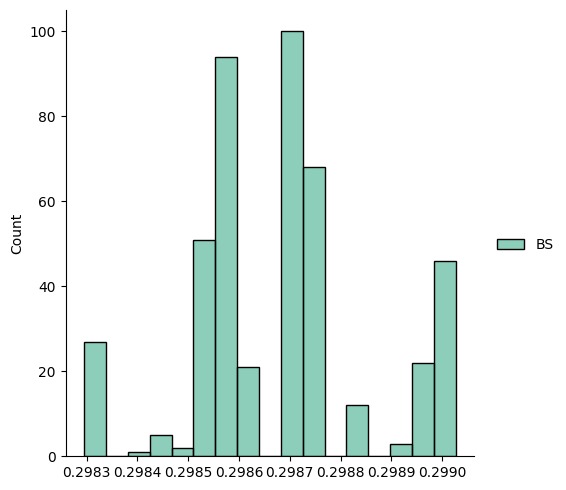

In [84]:
print(boxcox_bs.skew())
sns.displot(boxcox_bs);

In [85]:
df_transformed['BS'] = boxcox_bs['BS']

In [86]:
df_transformed[['BS', 'Age']].skew().to_frame().rename(columns={0:'Skew'}).sort_values('Skew', ascending=False)

,Skew
BS,0.264687
Age,0.197419


After performing the log and boxcox transformations, the skewness of:
- blood sugar lowered from 2.26 to 0.26.
- and age 0.92 to 0.2

It made the distributions fairly normal.

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="prepr"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">8. Data Preprocessing</p>

<a id="sep"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">8.1. Separate features and target</p>

Set a **variable X** equal to the numerical features and a **variable y** equal to the "RiskLevel" column.

In [87]:
X = df_transformed.drop('RiskLevel', axis=1)
y = df_transformed['RiskLevel']

<a id="scale"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">8.2. Feature Scaling</p>

In [88]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

<a id="split"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">8.3. Train / Test Split </p>

Split the data into training and testing sets.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="ml"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">9. Machine Learning Models</p>

<a id="knn"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">9.1. KNeighborsClassifier </p>

In [90]:
# Create and fit a KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Make predictions on the test data
knn_preds = knn.predict(X_test)

### Evaluation

In [91]:
print('K Nearest Neighbors K=1')
print('\n')
print(confusion_matrix(y_test,knn_preds))
print('\n')
print(classification_report(y_test,knn_preds))

K Nearest Neighbors K=1


[[49 17  4]
 [17  8  7]
 [ 5 10 19]]


              precision    recall  f1-score   support

           0       0.69      0.70      0.70        70
           1       0.23      0.25      0.24        32
           2       0.63      0.56      0.59        34

    accuracy                           0.56       136
   macro avg       0.52      0.50      0.51       136
weighted avg       0.57      0.56      0.56       136



## Choosing a K Value

In [92]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

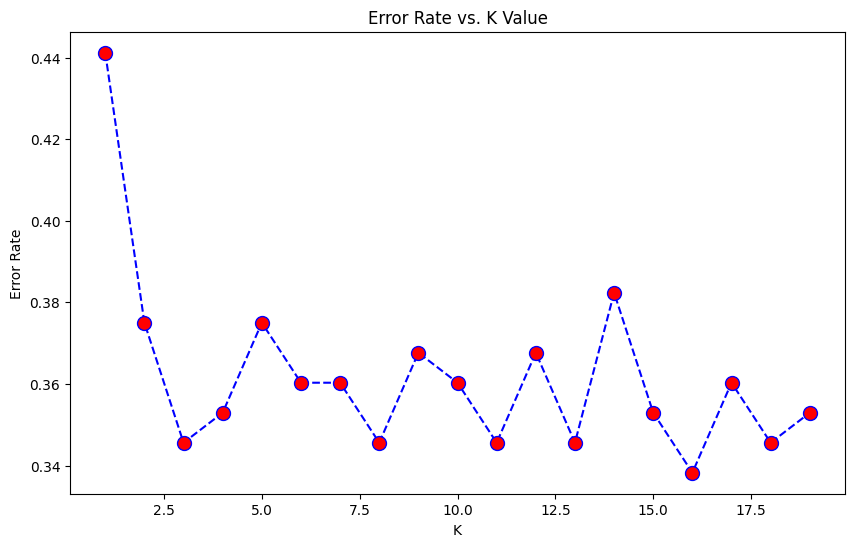

In [93]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [94]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)

print('K Nearest Neighbors K=16')
print('\n')
print(confusion_matrix(y_test,knn_preds))
print('\n')
print(classification_report(y_test,knn_preds))

K Nearest Neighbors K=16


[[62  6  2]
 [20  6  6]
 [ 9  3 22]]


              precision    recall  f1-score   support

           0       0.68      0.89      0.77        70
           1       0.40      0.19      0.26        32
           2       0.73      0.65      0.69        34

    accuracy                           0.66       136
   macro avg       0.60      0.57      0.57       136
weighted avg       0.63      0.66      0.63       136



<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="svc"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">9.2. Support Vector Machine </p>

The classification report for KNN indicates that class imbalance significantly skews the results. The recall and F1-score for the first class are particularly low, at 0.19 and 0.26, respectively. To address this issue, I will use the `class_weight` parameter available in many classification models. Given that half of our observations belong to class 0, a quarter to class 1, and another quarter to class 2, I will assign the following weights: 0.2 to class 0, and 0.4 to classes 1 and 2.

In [95]:
# Define class weights
class_weight = {0: 0.2, 1: 0.4, 2: 0.4}

In [96]:
# Create and fit a SVC model
svc = SVC(class_weight=class_weight)
svc.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
svcKernel_pred = svc.predict(X_test)

# Evaluate the model
print('Support Vector Machine')
print('\n')
print(confusion_matrix(y_test, svcKernel_pred))
print("\n")
print(classification_report(y_test, svcKernel_pred))

Support Vector Machine


[[59  7  4]
 [17  7  8]
 [ 3  6 25]]


              precision    recall  f1-score   support

           0       0.75      0.84      0.79        70
           1       0.35      0.22      0.27        32
           2       0.68      0.74      0.70        34

    accuracy                           0.67       136
   macro avg       0.59      0.60      0.59       136
weighted avg       0.64      0.67      0.65       136



<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="rfc"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">9.3. Random Forest Classifier </p>

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="xgb"></a>
## <p style="background-color: #1a7365; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:9px">9.4. XGBoost Classifier </p>

In [97]:
# prompt: Best parameters found: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2} generate xgboost model on this xgb_classifier.fit(X_train, y_train)
# # Make predictions
# xgb_pred = xgb_classifier.predict(X_test) and then pickle it

import pickle
# Assuming xgb_classifier is already defined and fitted
xgb_classifier = xgb.XGBClassifier(eta=0.1, max_depth=2, min_child_weight=2)
xgb_classifier.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_classifier.predict(X_test)

# Pickle the model
filename = 'xgb_model.pkl'
pickle.dump(xgb_classifier, open(filename, 'wb'))

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="ht"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">10. Bonus: Hypothesis Testing</p>

In this hypothesis testing, we will prove or disapprove that women who are 30 years old and older have higher pregnancy risk level.

Let  𝜇1 be the population mean for pregnancy risk level for women under 30 y.o and 𝜇2 be the population mean for risk level for women equal or over 30 y.o. First, we will calculate these mean values.

In [98]:
under_30 = df.loc[df.Age < 30]
under_30_risk = under_30.RiskLevel
under_mean = under_30_risk.mean()
under_mean

0.5878136200716846

In [99]:
over_30 = df.loc[df.Age >= 30]
over_30_risk = over_30.RiskLevel
over_mean = over_30_risk.mean()
over_mean

0.9595375722543352

Now, let's define our null and alternative hypothesis.

$ 𝐻_{0}:\mu_{1}-\mu_{2} = 0  $  The risk level of pregnancy does not depend on age of a woman  \
$ 𝐻_{A}:\mu_{1}-\mu_{2} != 0 $  Women over 30 have higher pregnacy risk level, compared to women in 20s and younger.

It is always useful to have a visual representation of the data that we are working with. So, let's create countplot of risk levels for women under 30 vs above.

In [100]:
df['IsOver30'] = [1 if x >= 30 else 0 for x in df['Age']]

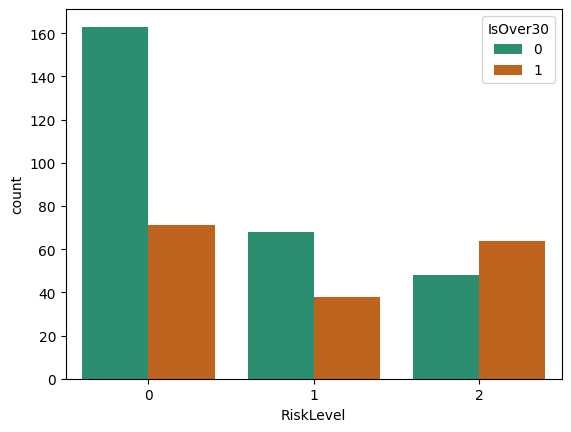

In [101]:
sns.countplot(data=df, x='RiskLevel', hue='IsOver30');

Only looking at the mean values that we've calculated and the countplot above seems like there is a significant difference in pregnancy risk levels for women under and above 30, but let's set the decision criteria and calculate p-value before jumping into conclusions. We choose 5% significance level. Therefore, our $ \alpha=0.05 $.

Here, we are comparing two different categorical variables, under 30 and over 30 years old and 3 risk levels. For this type of analysis, we will perform a `chi-square test`.

First, we will calculate a contingency table that will basically give us the same countplot above but in the table format. For this, we will use pandas `crosstab()` function.

In [102]:
contingency= pd.crosstab(df.RiskLevel, df.IsOver30)
contingency

IsOver30,0,1
RiskLevel,,
0,163,71
1,68,38
2,48,64


Now, using `chi2_contingency()` method, from the *scipy.stats* `chi2_contingency`, we will calculate chi-squared, p-value, degrees of freedom, and expected frequencies for our data.

In [103]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

chi-square statistic: 23.374318560745017 , p_value: 8.40100446268846e-06 , degree of freedom: 2 ,expected frequencies: [[144.4380531   89.5619469 ]
 [ 65.42920354  40.57079646]
 [ 69.13274336  42.86725664]] 


In [104]:
if (p_val < 0.05):
    print('Reject the null hypothesis that the risk level of pregnancy does not depend on age of a woman.')
else:
    print('We failed to reject the null hypothesis that the risk level of pregnancy does not depend on age of a woman.')

Reject the null hypothesis that the risk level of pregnancy does not depend on age of a woman.


**Conclusion**: The P-value is very low, much lower than our 5% significance level. Thus, we reject the hypothesis that the risk level of pregnancy does not depend on age of a woman. Therefore, the risk level is different depending on age, and women over 30 have higher pregnancy risk level, compared to women in their 20s and younger.